# Data Augmentation
A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary for the training to occur with a large amount of data (dataset), but in many cases it is not available of the data necessary to perform these tasks.
This is where the **Data Augmentation** technique comes in, which, as its name suggests, allows us to augment our data set in two ways:




* Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
* Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.


At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

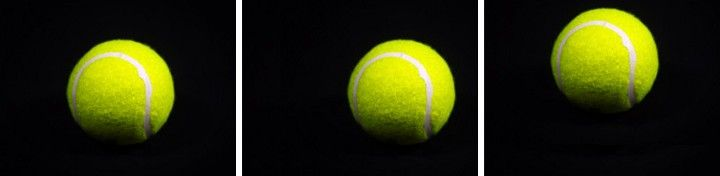



The same ball with some translations



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1. Turn (Flip)
2. Rotation

1. Scale
2. Trim

1. Translation
2. Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



* The changes in the image (translations) through the arguments **width_shift_range** and **height_shift_range**.
* Flip the image using the **horizontal_flip** and **vertical_flip** arguments.
* Rotations of images through the argument **rotation_range**
* Image brightness using the **brightness_range** argument.
* Image zoom using the **zoom_range** argument.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values ​​within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #class that takes original data, transforms it randomly and returns only the new transformed data
from PIL import Image #python image library
from urllib.request import urlopen #Lets you read an email address


Primero cargamos una imagen de internet


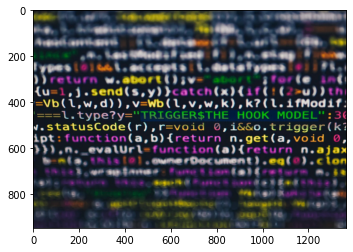

In [ ]:
url = 'https://i.blogs.es/fd396a/hook/1366_2000.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)



Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.

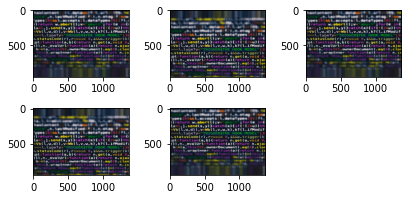

In [ ]:
# We convert the image to an arrangement
data = img_to_array(img)
# we make an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only image change
datagen = ImageDataGenerator(height_shift_range=[-100,100])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(5):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #it is converted to a valid value to be able to display it as an imageeu 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the **ImageDataGenerator** class.

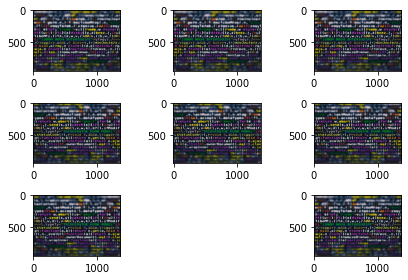

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

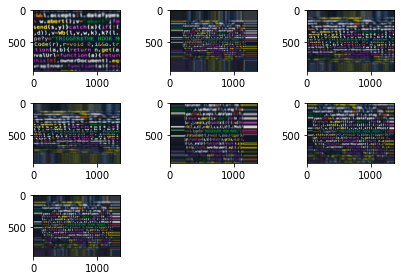

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(7):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

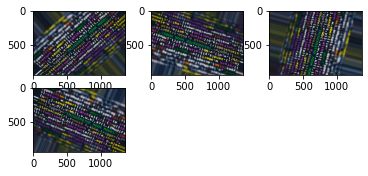

In [ ]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
for i in range(4):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boleano, set the mean of each element to zero of all data.
              samplewise_center**: Boleano, set the mean of each sample to zero
              featurewise_std_normalization: Boleano, Divide the entries by the standard deviation (std.) Of the data set, based on the characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening: Boleano, indicates if bleaching is applied ZCA.      

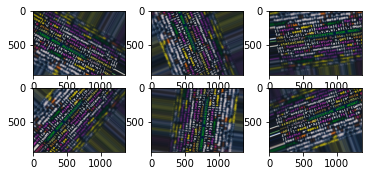

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

Arguments

**directory:** Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.

**labels:** Either "inferred" (labels are generated from the directory structure), or a list/tuple of integer labels of the same size as the number of image files found in the directory. Labels should be sorted according to the alphanumeric order of the image file paths (obtained via os.walk(directory) in Python).

**label_mode:** - 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss). - 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss). - 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy). - None (no labels).

Arguments

**path:** Path to image file.

**grayscale:** DEPRECATED use color_mode="grayscale".

**color_mode:** One of "grayscale", "rgb", "rgba". Default: "rgb". The desired image format.

**target_size:** Either None (default to original size) or tuple of ints (img_height, img_width).

**interpolation:** Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.

# TextAttack
Es un framework de Python para ataques de adversario, entrenamiento de adversarios y aumento de datos en NLP. Nos centraremos solo en el aumento de datos.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 5.7MB/s 
     |████████████████████████████████| 153kB 23.4MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 778kB 13.5MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 3.0MB 42.9MB/s 
     |████████████████████████████████| 245kB 30.5MB/s 
     |████████████████████████████████| 235kB 49.3MB/s 
     |████████████████████████████████| 1.1MB 52.2MB/s 
     |████████████████████████████████| 686kB 58.7MB/s 
     |████████████████████████████████| 1.7MB 48.6MB/s 
     |████████████████████████████████| 317kB 51.7MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 17.3MB 201kB/s 
     |████████████████████████████████| 245kB 47.7MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
     |████████████████████████████████| 19.7MB 98kB/s 
     |████████████████████████████████| 983kB 54.3MB/s 

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 22:43:32 INFO: Downloading default packages for language: en (English)...
2020-10-16 22:46:49 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "Wherever you go, go with all your heart"

TextAttack nos proporciona cuatro métodos para el aumento de datos.


## WordNetAugmenter
Aumenta el texto reemplazándolo con sinónimos del tesauro (diccionario de sinónimos) de WordNet.

WordNet es una base de datos léxica del inglés. Los sustantivos, verbos, adjetivos y adverbios se agrupan en conjuntos de sinónimos cognitivos (synsets), cada uno de los cuales expresa un concepto distinto.
WordNet se parece superficialmente a un tesauro, ya que agrupa las palabras en función de su significado.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['Wherever you run, go with all your heart']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Where you go, go with all your heart']

## CharSwapAugmenter
Aumenta el texto sustituyendo, eliminando, insertando e intercambiando caracteres adyacentes.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['Wherever you go, No with all your heart']


## EasyDataAugmenter
Esto aumenta el texto con una combinación de reemplazo de sinónimos de Wordnet, eliminación de palabras, cambios de orden de palabras e inserciones de sinónimos. Todas estas 4 funcionalidades ocurren de forma aleatoria. Entonces obtendremos resultados diferentes cada vez que ejecutemos el código. Esto devuelve 4 resultados aumentados, a diferencia de los otros métodos.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Wherever you go, last with all your heart',
 'Wherever you go, go all your heart',
 'Wherever you inwardness go, go with all your heart',
 'Wherever you go, go with heart your all']

Googletrans  utiliza la API Ajax de Google Translate para la detección y traducción de idiomas.

Los parámetros clave para el método **translate ()** son:



1.   **src**: idioma de origen. este parámetro es opcional ya que **googletrans** lo detectará.
2.   **dest**: idioma de destino. Parámetro obligatorio.

1.   **text**: el texto que se va a traducir del idioma de origen al idioma de destino. Parámetro obligatorio.





 



Al utilizar este metodo lo que ocurre es una retraduccion, pasamos del idioma original a un idioma destino y luego regresamos al original, durante esta retrotraducción, hay un ligero cambio en la oración entre el texto original y el texto retrotraducido, pero el significado general de la oración aún se conserva.

Los idiomas soportados se pueden consultar en https://cloud.google.com/translate/docs/languages?hl=es

Para obtener los mejores resultados se recomienda hacer algunas pruebas con los idiomas, si el lenguaje destino es muy similar la traduccion no pierde informacion, sin embargo se puede tener el problema de que la traduccion sea demasiado literal, esto se vuelve un poco un problema de prueba y error.


Algunos ejemplos de idiomas:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 972kB 9.2MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=5de4d08beb7881e6b9f5a5acfc346404e3c2f76b7ddfb64347288f6ad45f9b68
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=4b788aa439898a939a296f095228f0142f0698f7e8df2e3441a6b50c7d2e3092
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "Wherever you go, go with all your heart."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Wherever you go, go with all your heart.
Nomaphi lapho uya khona, hamba ngayo yonke inhliziyo yakho.
Wherever you go, go with all your heart.
